### **Question 1:What percentage of users opened the email and what percentage clicked on the link within the email?**


# **🐍 Step 1: Mount Google Drive and Load the Datasets**

In [4]:
# Mount Google Drive to access files stored in it
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files into DataFrames using specified paths
email_df = pd.read_csv('/content/drive/MyDrive/EMAIL_ASSIGNMENT/email_table.csv')
opened_df = pd.read_csv('/content/drive/MyDrive/EMAIL_ASSIGNMENT/email_opened_table.csv')
clicked_df = pd.read_csv('/content/drive/MyDrive/EMAIL_ASSIGNMENT/link_clicked_table.csv')

# Display the first few rows to ensure data is loaded correctly
email_df.head(), opened_df.head(), clicked_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(   email_id   email_text email_version  hour    weekday user_country  \
 0     85120  short_email  personalized     2     Sunday           US   
 1    966622   long_email  personalized    12     Sunday           UK   
 2    777221   long_email  personalized    11  Wednesday           US   
 3    493711  short_email       generic     6     Monday           UK   
 4    106887   long_email       generic    14     Monday           US   
 
    user_past_purchases  
 0                    5  
 1                    2  
 2                    2  
 3                    1  
 4                    6  ,
    email_id
 0    284534
 1    609056
 2    220820
 3    905936
 4    164034,
    email_id
 0    609056
 1    870980
 2    935124
 3    158501
 4    177561)

# **Step 2: Check the Size of Each Dataset**

In [7]:
# Print the number of records in each dataset to understand dataset sizes
print("Emails sent:", len(email_df))
print("Emails opened:", len(opened_df))
print("Emails clicked:", len(clicked_df))


   email_id  opened  clicked
0     85120       0        0
1    966622       1        1
2    777221       0        0
3    493711       0        0
4    106887       0        0


# **Step 3: Merge Opened and Clicked Information into Main Email Table**

In [8]:
# Add a new column 'opened': 1 if the email_id is in opened_df, else 0
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)

# Add a new column 'clicked': 1 if the email_id is in clicked_df, else 0
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Confirm that the columns are added
print(email_df[['email_id', 'opened', 'clicked']].head())


   email_id  opened  clicked
0     85120       0        0
1    966622       1        1
2    777221       0        0
3    493711       0        0
4    106887       0        0


# **Step 4: Calculate Open Rate and Click Rate**

In [9]:
# Calculate open and click rates
open_rate = email_df['opened'].mean() * 100
click_rate = email_df['clicked'].mean() * 100

# Display the calculated rates
print(f"Open Rate: {open_rate:.2f}%")
print(f"Click Rate: {click_rate:.2f}%")


Open Rate: 10.35%
Click Rate: 2.12%


# **Step 5: Visualize the Distribution of Email Text Types**

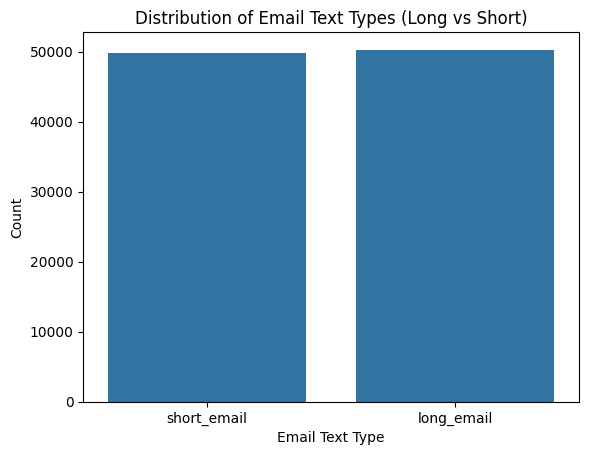

In [10]:
# Countplot of long vs short email text versions
sns.countplot(x='email_text', data=email_df)
plt.title('Distribution of Email Text Types (Long vs Short)')
plt.xlabel('Email Text Type')
plt.ylabel('Count')
plt.show()


# **Step 6: Visualize the Distribution of Personalization**

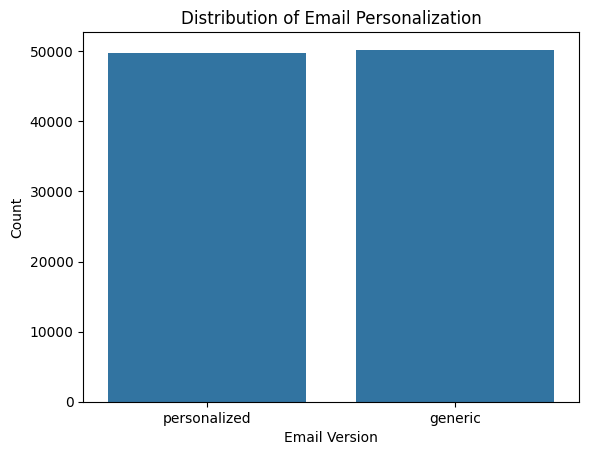

In [11]:
# Countplot of personalized vs generic emails
sns.countplot(x='email_version', data=email_df)
plt.title('Distribution of Email Personalization')
plt.xlabel('Email Version')
plt.ylabel('Count')
plt.show()


# **Step 7: Analyze Email Send Time (Hour and Weekday)**

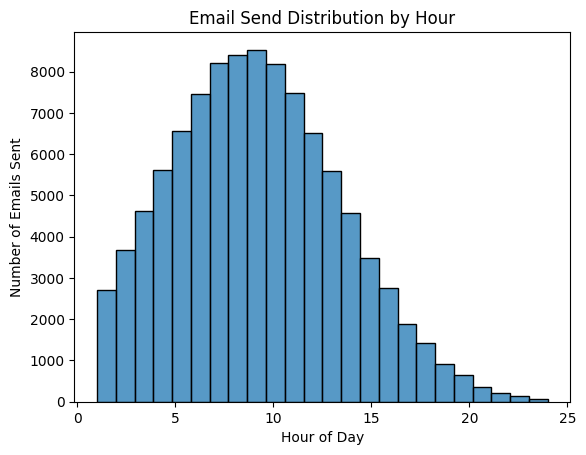

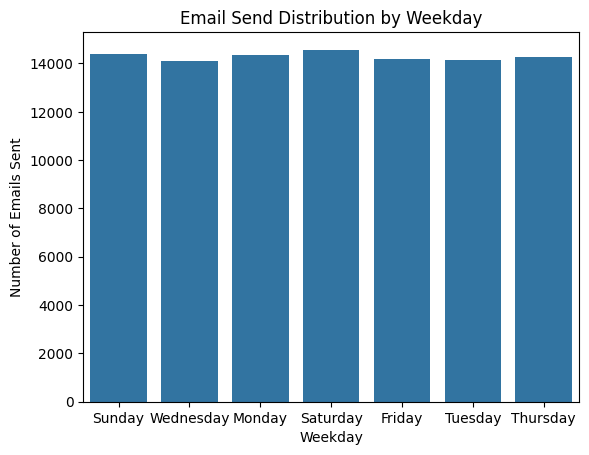

In [12]:
# Distribution of send hour
sns.histplot(email_df['hour'], bins=24, kde=False)
plt.title('Email Send Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Emails Sent')
plt.show()

# Distribution by weekday
sns.countplot(x='weekday', data=email_df)
plt.title('Email Send Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Emails Sent')
plt.show()


# **Step 8: Distribution of User Past Purchases**

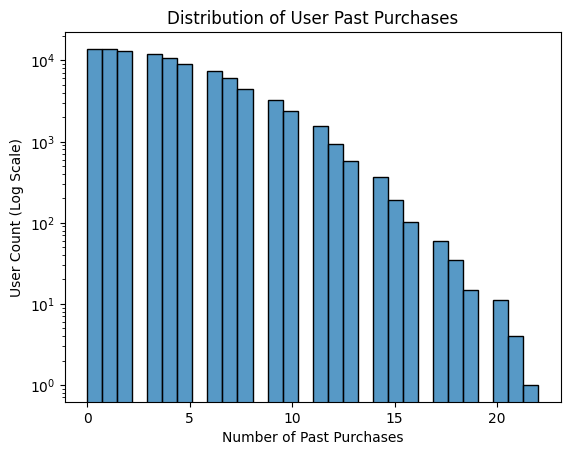

In [13]:
# Histogram of past purchases (log scale to handle skewed data)
sns.histplot(email_df['user_past_purchases'], bins=30)
plt.yscale('log')
plt.title('Distribution of User Past Purchases')
plt.xlabel('Number of Past Purchases')
plt.ylabel('User Count (Log Scale)')
plt.show()


# **Step 9: Open vs Click Rate Comparison**

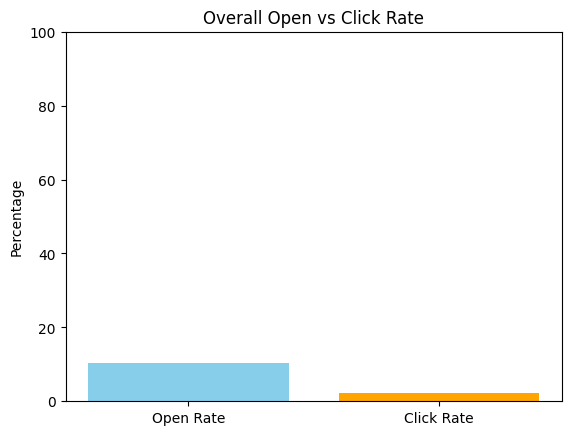

In [14]:
# Bar chart to compare open and click rate
plt.bar(['Open Rate', 'Click Rate'], [open_rate, click_rate], color=['skyblue', 'orange'])
plt.title('Overall Open vs Click Rate')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()


# **Step 10: Funnel Visualization - Email Sent → Opened → Clicked**

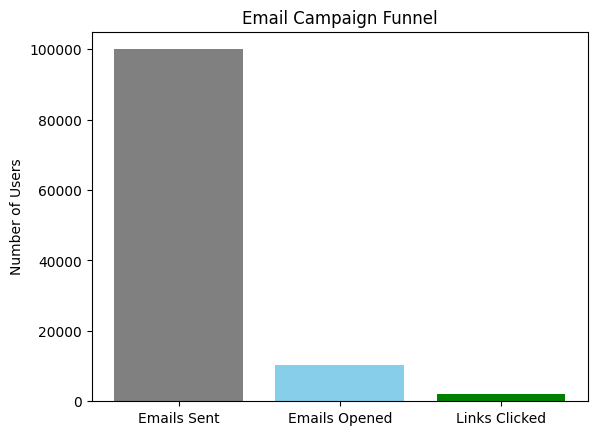

In [15]:
# Calculate funnel values
sent = len(email_df)
opened = email_df['opened'].sum()
clicked = email_df['clicked'].sum()

# Plot the funnel
plt.bar(['Emails Sent', 'Emails Opened', 'Links Clicked'], [sent, opened, clicked], color=['grey', 'skyblue', 'green'])
plt.title('Email Campaign Funnel')
plt.ylabel('Number of Users')
plt.show()
